In [3]:
import torch
print(f'PyTorch version: {torch.__version__}')
print('*'*10)
print(f'_CUDA version: ')
!nvcc --version
print('*'*10)
print(f'CUDNN version: {torch.backends.cudnn.version()}')
print(f'Available GPU devices: {torch.cuda.device_count()}')
print(f'Device Name: {torch.cuda.get_device_name()}')

PyTorch version: 2.1.2+cu121
**********
_CUDA version: 
nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Tue_Jun_13_19:42:34_Pacific_Daylight_Time_2023
Cuda compilation tools, release 12.2, V12.2.91
Build cuda_12.2.r12.2/compiler.32965470_0
**********
CUDNN version: 8801
Available GPU devices: 1
Device Name: NVIDIA GeForce RTX 3080


In [4]:
import requests
from PIL import Image

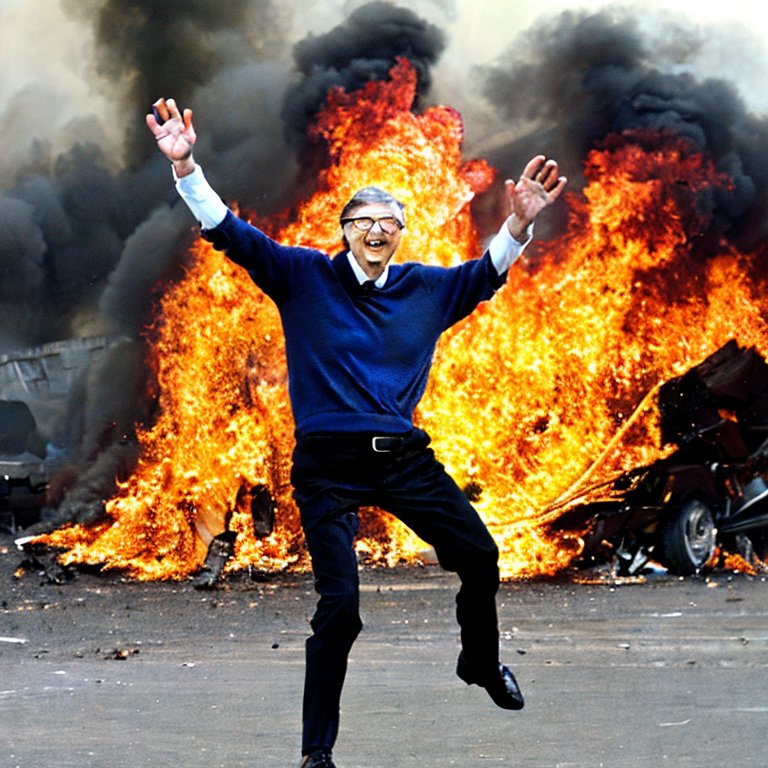

In [5]:
image_url = "https://cdn-uploads.huggingface.co/production/uploads/1676963251338-noauth.jpeg"
image = Image.open(requests.get(image_url, stream=True).raw)
image

In [6]:
import torch
from transformers import BitsAndBytesConfig

quantization_config = BitsAndBytesConfig(
    load_in_4bit=False,
    bnb_4bit_compute_dtype=torch.float16
)

# do not use this cell, quantization is not supported very well for windows

In [1]:
from transformers import pipeline

model_id = "llava-hf/llava-1.5-7b-hf"

pipe = pipeline("image-to-text", model=model_id)

c:\Users\Admin\Documents\code\monorepo\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
generation_config.json: 100%|██████████| 141/141 [00:00<00:00, 282kB/s]
c:\Users\Admin\Documents\code\monorepo\venv\lib\site-packages\huggingface_hub\file_download.py:149: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Admin\.cache\huggingface\hub\models--llava-hf--llava-1.5-7b-hf. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need

In [7]:
max_new_tokens = 200
prompt = "USER: <image>\nwhat is happening in this photo?\nASSISTANT:"

outputs = pipe(image, prompt=prompt, generate_kwargs={"max_new_tokens": 200})

In [8]:
print(outputs[0]["generated_text"])

USER:  
what is happening in this photo?
ASSISTANT: In the photo, a man is standing in the middle of a fire, surrounded by flames. He appears to be enjoying the experience and is even smiling. The fire is quite large, covering a significant portion of the scene. The man is the main focus of the image, and his presence amidst the flames adds an element of excitement and danger to the scene.
